<a href="https://colab.research.google.com/github/Narthanasiva/Narthanasiva/blob/main/Face_Mask_Detection_using_ML(NOT_REAL_TIME).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 01 : Import necessary libraries**

In colab no need to install any libraries. Just import the required packages

In [1]:
import numpy as np                                                               #for array calculations
import cv2                                                                       #for image processing tasks
from imutils import paths                                                        #repeatedly find images based on a root directory
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers                                              #for deep learning model
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report                                #representation of the main classification metrics on a per-class basis

# **Step 02 : Download the dataset and Set path to read the image dataset**

dataset :
 https://www.kaggle.com/omkargurav/face-mask-dataset?select=data


 download it from the kaggle


In [2]:
import os
os.environ['KAGGLE_USERNAME']='narthanasivalingam'
os.environ['KAGGLE_KEY']='50f1d43b3b581792791ac4d94d21d414'

In [3]:
! kaggle datasets download -d omkargurav/face-mask-dataset    #comandline script ;    ! - used to download any packages in colab

 96% 156M/163M [00:01<00:00, 126MB/s]
100% 163M/163M [00:01<00:00, 120MB/s]


In [ ]:
! unzip face-mask-dataset.zip 

In [5]:
withMaskPath = "/content/data/with_mask"
withoutMaskPath = "/content/data/without_mask"

Using paths from imutils package we are creating a list of all the image paths

In [6]:
withMaskImagePaths = list(paths.list_images(withMaskPath))
withoutMaskImagePaths = list(paths.list_images(withoutMaskPath))

# **Step 03 : Dataset preprocessing**

Read each image and save it in the form of pixel in x.
This is for computational manipulatuin of images.



In [7]:
x=[]

combinedDataset = withMaskImagePaths + withoutMaskImagePaths

for imagePath in combinedDataset:
  imageArray = cv2.imread(imagePath)
  imageSize = 50
  newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
  x.append(newImageArray)
print(len(x))

7553


We have created a list of integers representing the output (y). 1 represents with_mask and 0 represents.

In [8]:
y = np.array([1]*len(withMaskImagePaths) + [0]*len(withoutMaskImagePaths))
x = np.array(x)

# Step 04 : Split the dataset for training & testing**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)   

# **Step 05 : Training the model**

In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50, 50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

In [11]:
model.save('face-mask-image-classfication.h5')

# **Step 06 : Predictions**

In [12]:
model.evaluate(x_test, y_test)                                                  #using test set

71/71 [==============================] - 1s 5ms/step - loss: 0.1924 - accuracy: 0.9457


[0.19235336780548096, 0.945719301700592]

Classification report gives more detail about the accuracy using the testing set

In [13]:
y_preds = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_preds]
#print('classfication report:' , classification_report(y_test, y_pred_classes))

***Randomly choose a image from the test set of with_out mask and predict its ootput***

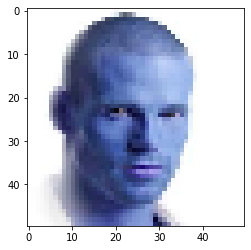

prediction: with_mask


In [15]:
classes=["with_mask","without_mask"]
imageArray = cv2.imread(withoutMaskImagePaths[1000])
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
plt.imshow(newImageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])

***Randomly choose a image from the test set of with_out mask and predict its ootput***

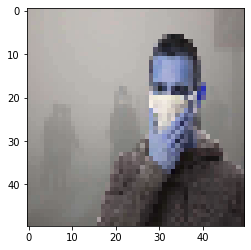

prediction: without_mask


In [16]:
imageArray = cv2.imread(withMaskImagePaths[900])
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
plt.imshow(newImageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])